In [2]:
import numpy as np
import pandas as pd
#from geopy.geocoders import GeoNames as gn
from geopy import geocoders  

In [3]:
nlrb_df = pd.read_csv("recent_election_results__all_dates_--20221111184423.csv")

print("Size = ", nlrb_df.shape)
nlrb_df.head()

Size =  (15790, 31)


,Region,Case Number,Case Name,Status,Date Filed,Date Closed,Reason Closed,City,States & Territories,Unit ID,...,Votes Against,Total Ballots Counted,Runoff Required,Challenged Ballots,Challenges are Determinative,Union to Certify,Voting Unit (Unit A),Voting Unit (Unit B),Voting Unit (Unit C),Voting Unit (Unit D)
0,"Region 07, Detroit, Michigan",07-RC-090540,Tendercare West,Closed,10/2/2012,11/21/2012,Certific. of Representative,Lansing,MI,A,...,28.0,57.0,NaN,NaN,NaN,SEIU HEALTHCARE MICHIGAN,All full-time and regular part-time certified ...,NaN,NaN,NaN
1,"Region 07, Detroit, Michigan",07-RC-090527,Tendercare West,Closed,10/2/2012,11/21/2012,Certific. of Representative,Lansing,MI,A,...,3.0,11.0,NaN,2.0,NaN,"SEIU Healthcare Michigan, Service Employees In...",NaN,NaN,NaN,NaN
2,"Region 05, Baltimore, Maryland",05-RC-089835,Jenkins Security Consultants,Closed,9/24/2012,11/26/2012,Certific. of Representative,Washington,DC,A,...,NaN,12.0,NaN,NaN,NaN,United Security & Police Officers of America (...,All full-time and part-time security officers ...,NaN,NaN,NaN
3,"Region 19, Seattle, Washington",19-UD-091184,"First Student, Inc.",Closed,10/12/2012,12/10/2012,Certification of Results,Lake Oswego,OR,A,...,9.0,27.0,NaN,2.0,NaN,NaN,All full-time and regular part-time drivers em...,NaN,NaN,NaN
4,"Region 28, Phoenix, Arizona",28-RC-079901,Sylvania Lighting Services Corp.,Closed,4/30/2012,11/27/2012,Certification of Results,Las Vegas,NV,A,...,16.0,24.0,NaN,NaN,NaN,NaN,Included: All full-time and regular part-time ...,NaN,NaN,NaN


array([[<AxesSubplot:title={'center':'No of Eligible Voters'}>,
        <AxesSubplot:title={'center':'Participation Ratio'}>]],
      dtype=object)

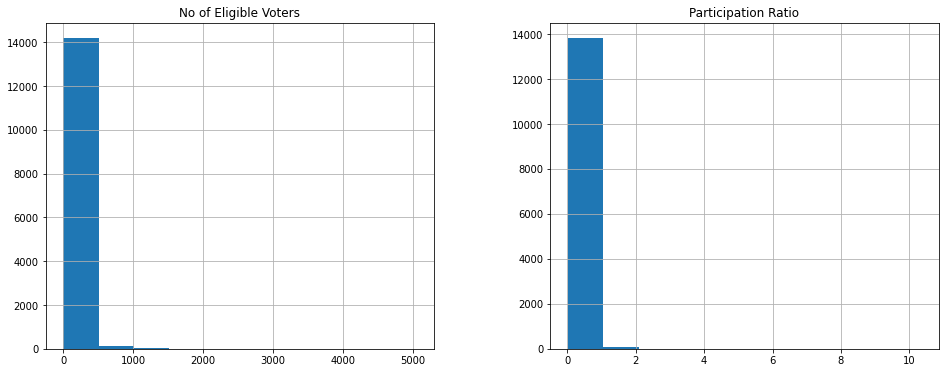

In [4]:
nlrb_df['Participation Ratio'] =  nlrb_df['Total Ballots Counted'] / nlrb_df['No of Eligible Voters']
nlrb_df = nlrb_df[nlrb_df['Ballot Type'] == "Single Labor Organization"]        #Only want single labor org elections

nlrb_df.hist(['No of Eligible Voters', 'Participation Ratio'], figsize=(16,6))


In [56]:
nlrb_df = nlrb_df[nlrb_df['No of Eligible Voters'] > 99]
nlrb_df = nlrb_df[nlrb_df['Participation Ratio'] > 0.5]
print("Size = ", nlrb_df.shape)

loc_dict = {}

Size =  (1781, 34)


In [60]:
#Add latitude-longitude info
gn = geocoders.GeoNames(username="rowens2")
nlrb_df["Location String"] = nlrb_df['City'] + ", " + nlrb_df['States & Territories'] + ", US"
#print(nlrb_df['Location String'])
#ll = gn.geocode("Brattleboro, VT, US", exactly_one=False)[0]
#print(ll.latitude)


8          Brattleboro, VT, US
12          COTTONDALE, AL, US
13        Grand Rapids, MN, US
29       Staten Island, NY, US
40          CINCINNATI, OH, US
                 ...          
15628         Bismarck, ND, US
15665      New Britain, CT, US
15668       Long Beach, CA, US
15713           Austin, MN, US
15735          Phoenix, AZ, US
Name: Location String, Length: 1781, dtype: object
42.85092
Error identifying location:  PONCE, PR, US
Error identifying location:  DELHI AND OAK GROVE, LA, US
Error identifying location:  Pacifica, Fremont, Burlingame, CA, US
Error identifying location:  Aguadilla, PR, US
Error identifying location:  Toa Baja, PR, US
Error identifying location:  Eielson AFB, AK, US


GeocoderQuotaExceeded: the hourly limit of 1000 credits for rowens2 has been exceeded. Please throttle your requests or use the commercial service.

In [76]:

for row in nlrb_df['Location String']:
    if row in loc_dict.keys():
        #skip any locations we've already gotten
        continue

    geo_code = gn.geocode(row, exactly_one=False)
    if geo_code is None:
        print("Error identifying location: ", row)
        geo_loc = None
        input("PRess enter")
    else:
        geo_loc = geo_code[0]

    loc_dict[row] = geo_loc


Error identifying location:  Penuelas, PR, US
Error identifying location:  Naranjito, PR, US
Error identifying location:  Arecibo, PR, US
Error identifying location:  Ponce, PR, US


In [77]:
nlrb_df['Geo Location'] = nlrb_df['Location String'].map(loc_dict)
nlrb_df = nlrb_df.replace(to_replace={'Geo Location':"Null"}, value=None)
lat = []
long = []
for row in nlrb_df['Geo Location']:
    #print(row)
    if (row is None) or (type(row)==float):
        lat.append(None)
        long.append(None)
    else:
        lat.append(row.latitude)
        long.append(row.longitude)

nlrb_df['Latitude'] = lat
nlrb_df['Longitude'] = long
print(nlrb_df.isnull().sum())
#print(nlrb_df.head(10))

Region                             0
Case Number                        0
Case Name                          0
Status                             0
Date Filed                         0
Date Closed                        0
Reason Closed                      0
City                               0
States & Territories               0
Unit ID                            0
Ballot Type                        0
Tally Type                         0
Tally Date                         0
No of Eligible Voters              0
Void Ballots                     997
Labor Union1                       0
Votes for Labor Union1             3
Labor Union2                    1780
Votes for Labor Union2          1781
Labor Union3                    1781
Votes for Labor Union3          1781
Votes Against                     16
Total Ballots Counted              0
Runoff Required                 1778
Challenged Ballots               447
Challenges are Determinative    1661
Union to Certify                 645
V

In [80]:
unknown_loc = nlrb_df[nlrb_df['Geo Location'].isnull()]

print(unknown_loc)

                                     Region   Case Number  \
763               Region 12, Tampa, Florida  24-RC-099415   
1081              Region 12, Tampa, Florida  24-RC-099271   
6217      Region 15, New Orleans, Louisiana  15-RD-172485   
6710   Region 20, San Francisco, California  20-RD-166642   
7374              Region 12, Tampa, Florida  12-RC-188714   
7652              Region 12, Tampa, Florida  12-RC-192820   
9090         Region 19, Seattle, Washington  19-RC-210428   
13226             Region 12, Tampa, Florida  12-RD-270948   
13524             Region 12, Tampa, Florida  12-RD-274767   
13569             Region 12, Tampa, Florida  12-RC-275136   
13718             Region 12, Tampa, Florida  12-RC-277990   
15187             Region 12, Tampa, Florida  12-RC-294973   
15228             Region 12, Tampa, Florida  12-RC-294302   

                                               Case Name  Status  Date Filed  \
763    Saint Luke's Memorial Hospital, Inc.,d/b/a Hos...  Closed 

In [82]:
nlrb_df = nlrb_df.dropna(subset=['Geo Location'])
print(nlrb_df.isnull().sum())

Region                             0
Case Number                        0
Case Name                          0
Status                             0
Date Filed                         0
Date Closed                        0
Reason Closed                      0
City                               0
States & Territories               0
Unit ID                            0
Ballot Type                        0
Tally Type                         0
Tally Date                         0
No of Eligible Voters              0
Void Ballots                     990
Labor Union1                       0
Votes for Labor Union1             3
Labor Union2                    1767
Votes for Labor Union2          1768
Labor Union3                    1768
Votes for Labor Union3          1768
Votes Against                     15
Total Ballots Counted              0
Runoff Required                 1765
Challenged Ballots               442
Challenges are Determinative    1648
Union to Certify                 636
V

In [83]:
nlrb_df.to_excel("nlrb_elections_cleaned.xlsx")